# Recursion and Induction

## Chapter 3 of the course textbook

Recursion is often used for computing something whereas induction is used for proving things.

A program is called _recursive_ if it calls itself, thus reducing an instance of a problem to some other instance of the same problem.  

In [ ]:
# Simple example
# You could of course just use len() to do this

def length(lst):
  # check whether lst is empty
  # can also say lst = []
  # this is the "first person in line"
  if not lst:
    return 0
  else:
    # print(lst[1:])
    # lst[1:] returns the list minus the 1st element (slice)
    return 1 + length(lst[1:])

print(length([5, 4, 2, 1, 6]))


5


In [ ]:
# Same as above in a one-liner
def length(lst):
  return 1 + length(lst[1:]) if lst else 0

print(length(['Ashok', 'Benito', 'Claire', 'David', 'Eustance' ]))

5


Factorial: Iteration Versus Recursion

What is the last nonzero digit of 20! and how many zeros follow it?  

In [ ]:
# It is easy to write a program that computes factorials
# This is iterative:
def factorial(n):
  assert n > 0 # or else you'll get an error
  result = 1
  for i in range(1, n + 1):
    result *= i
  return result

print(factorial(20))

2432902008176640000


There are three ways you can call range() : 
* `range(stop)` takes one argument.
* `range(start, stop)` takes two arguments.
* `range(start, stop, step)` takes three arguments.

```python
for i in range(10):
    print(i, end=" ")
print()
```
...will print 0 1 2 3 4 5 6 7 8 9

In [ ]:
# Let's do this again without range, using recursion
def factorial(n):
  assert n > 0
  if n == 1:
    return 1 # base case
  else:
    return n * factorial(n - 1)

print(factorial(10))

3628800


In [ ]:
# Compact versions
# With minor additions to consider the special
# case of 0!

from numpy import prod

def iFactorial(n):
  assert n >= 0
  return prod(range(1, n + 1))

def rFactorial(n):
  assert n > 0
  return n * factorial(n - 1) if n else 1

print(iFactorial(10))
print(rFactorial(10))

3628800
3628800


## **Problem 66** For what integers _n_ does the following program terminate?

In [ ]:
def strange(n):
  if n == 10:
    print('10!')
    return 9
  print(n)  
  return n * strange(n + 1)

# strange (10)
# strange(7)
strange(1)
strange(0)

1
2
3
4
5
6
7
8
9
10!
0
1
2
3
4
5
6
7
8
9
10!


0

## [Collatz Conjecture](https://en.wikipedia.org/wiki/Collatz_conjecture)

"The Collatz conjecture in mathematics asks whether repeating two simple arithmetic operations will eventually transform every positive integer into one. It concerns sequences of integers in which each term is obtained from the previous term as follows: if the previous term is even, the next term is one half of the previous term. If the previous term is odd, the next term is 3 times the previous term plus 1. The conjecture is that these sequences always reach 1, no matter which positive integer is chosen to start the sequence."

In [ ]:
def collatz(n):
  print(n)
  assert n >= 1
  if n == 1:
    return 0
  elif n % 2 == 0:
    return collatz(n // 2) # // used for integer division
  else:
    return collatz(3 * n + 1)

collatz(100151)


100151
300454
150227
450682
225341
676024
338012
169006
84503
253510
126755
380266
190133
570400
285200
142600
71300
35650
17825
53476
26738
13369
40108
20054
10027
30082
15041
45124
22562
11281
33844
16922
8461
25384
12692
6346
3173
9520
4760
2380
1190
595
1786
893
2680
1340
670
335
1006
503
1510
755
2266
1133
3400
1700
850
425
1276
638
319
958
479
1438
719
2158
1079
3238
1619
4858
2429
7288
3644
1822
911
2734
1367
4102
2051
6154
3077
9232
4616
2308
1154
577
1732
866
433
1300
650
325
976
488
244
122
61
184
92
46
23
70
35
106
53
160
80
40
20
10
5
16
8
4
2
1


0

In [ ]:
def foo(n):
  assert n >= 0
  print(n)
  if n == 0:
    return 0
  else:
    return foo(n-1) + 2 * n+1

foo(3)

3
2
1
0


15

**Problem 70** Prove tht any monetary amount starting from 8 can be paid using coins in denominations of 3 and 5.

This is a mathematical statement: The corresponding programming problem would be: Given an integer n ≥ 8, find a list of 3s and 5s whose sum is  _n_.

In [ ]:
def change(amount):
  assert amount >= 8
  if amount == 8:
    return [3, 5]
  if amount == 9:
    return [3, 3, 3]
  if amount == 10:
    return [5, 5]

  coins = change(amount - 3)
  coins.append(3)
  return coins

amount = 30
coins = change(amount)

# str converts the integer to a string, the map does this
# for all of the integers.
print(f"(amount)={'+'.join(map(str, coins))}")

(amount)=3+3+3+3+3+3+3+3+3+3


A more compact version of the same code:

In [ ]:
base_cases = {8:[3, 5], 9:[3, 3, 3], 10: [5, 5]}

def change(amount):
  assert amount >= 8
  if amount <= 10:
    return base_cases[amount]
  return change(amount-3) + [3]

change(87)

[3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

Who needs recursion?  Why not just do this:

In [ ]:
def change(amount):
  assert amount >= 8
  coins = []
  while amount % 3 != 0:
    coins.append(5)
    amount -= 5
  while amount != 0:
    coins.append(3)
    amount -= 3
  return coins

print(change(13))

[5, 5, 3]


This program _should_ work for all payable amounts, but to see this, _we need a separate proof that every amount starting from 8 is payable._  The previous program implicitly provided such a proof by itself.  Moreover, being able to decompose a problem into smaller problems of the same type and to implement recursive solutions is an important skill in programming.  

**Problem 75**  What is the maximum integer amount that cannot be paid with 5- and 7-coins?

**Problem 76** Write a function `change(amount)` that for any integer _amount_ starting from 24 returns a list consisting of numbers 5 and 7 only, such that their sum is equal to amount.  

## Tower of Hanoi
The recursion ultimatum.  

In [ ]:
def hanoi_towers(n, from_rod, to_rod):
  if n == 1:
    print(f'Move disk from {from_rod} to {to_rod}')
  else:
    unused_rod = 6 - from_rod - to_rod
    hanoi_towers(n-1, from_rod, unused_rod)
    print(f'Move disk from {from_rod} to {to_rod}')
    hanoi_towers(n-1, unused_rod, to_rod)

hanoi_towers(3, 1, 3)

Move disk from 1 to 3
Move disk from 1 to 2
Move disk from 3 to 2
Move disk from 1 to 3
Move disk from 2 to 1
Move disk from 2 to 3
Move disk from 1 to 3


For _n_ = 3 we moved the largest disk (one move) and made some moves before that (preparation) and after that.  

If we denote the number of moves for three disks as $T_{3}$ and for two disks as $T_{2}$ then:

$T_{3}$ = $2T_{2}$ + 1 = 2 * 3 + 1 = 7

Or, generally:

$T_{n}$ = $2T_{n-1}$ + 1 where $T_{n}$ is the total number of moves used.

...

Rewriting the formula for $T_{n}+1$:

$T_{n}+1 = (2T_{n-1} + 1) + 1  = 2T_{n-1} + 2 = 2(T_{n-1} + 1)$

## Why Induction?
Why indeed?  Consider:

In [ ]:
def sum_of_integers(n):
  assert n > 0
  return sum(range(1, n + 1))

sum_of_integers(100)

5050

Because you are Russian, you suggest that code can be improved by using the _formula for arithmetic series_, which says that for every positive series _n_:

$\sum_{i=1}^n i = 1 + 2 + ... + n = \frac{n(n+1)}{2}$

It's easy to prove it's faster:

In [ ]:
def sum_of_integers(n):
  return(n*(n+1)//2)

sum_of_integers(100)

5050

It's easy to prove that it's valid for the first 100 integers:

In [ ]:
print(all(sum(range(1, n+1)) == n * (n+1) // 2 
  for n in range(1, 101)))

True


But how to prove that it's generally true?  **Induction!**

$\sum_{i=1}^n i = 1 + 2 + ... + n + (n + 1)$

$=(\sum_{i=1}^n i) + (n + 1)$

$=\frac{n(n+1)}{2} + (n + 1)$ (Follows from orig. formula)

$=\frac{n(n+1)}{2} + \frac{2(n+1)}{2}$

$=\frac{(n+1)(n+2)}{2}    {\square}$



## Bernoulli's inequality
Why did no one name a pastry after him?

Will you get $1,000,000 faster starting with $1,000 and earning 2% every day with compound interest or simple interest?

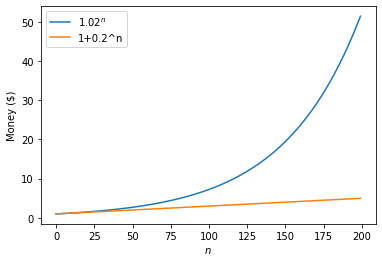

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.xlabel('$n$')
plt.ylabel('Money ($)')

x = np.arange(200)

plt.plot(x, 1.02 ** x, label='$1.02^n$')
plt.plot(x, 1 + 0.02 * x, label='1+0.2^n')
plt.legend(loc='upper left')

plt.savefig('bernoulli.png')


This holds in general: compound interest is always at least as profitable as simple interest.  This is known as Bernoulli's inequality, and it can be proved using mathematical induction.  

Specifically, Bernoulli's inequality says: 

For every _x_ ≥ -1 and _n_ ≥ 0, it holds that $(1 + x)^n ≥ 1 + xn.$ 

The base case $n = 0$ holds trivially:

$(1 + x)^0 = 1 = 1 + x * 0$

Now we prove the induction step from _n_ to (_n_ + 1) for every n ≥ 0

$(1 + x)^{n+1} = (1 + x)^n * (1 + x)$

which is ≥ $(1 + xn) * (1 + x)$

which is = $1 + x(n+1) + x^2n$

which is ≥ $1 + x(n + 1)$

where we used both the induction hypothesis for _n_, and the fact that an inequality can be multiplied by a non-negative value (1 + x).


In [4]:
def fraction(top):
  x = 0
  n = 1
  while(n <= top):
    x += 1/(n * (n + 1))
    n += 1
    # print (n, top)
  print(x)

fraction(100)

0.9900990099009898
